<a href="https://colab.research.google.com/github/Pearly108/SPP/blob/main/stock_predict_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

# List all files in the working directory
print("Files in /content:")
print(os.listdir('/content'))

Files in /content:
['.config', 'all_stocks_5yr.csv', 'sample_data']


In [8]:
import pandas as pd

# Read the CSV while skipping problematic lines
df = pd.read_csv('/content/all_stocks_5yr.csv', on_bad_lines='skip', engine='python')

# Display first few rows
print(df.head())
print("\nColumns:", df.columns)

         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51   14.1  14.27   8126000  AAL
3  2013-02-13   14.3  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL

Columns: Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

df = df[df['Name'] == 'AAPL']
df = df.sort_values('date')
data = df[['close']].values

In [25]:
x = []
y = []

In [26]:
sequence_length = 60

for i in range(sequence_length, len(scaled_data)):
    x.append(scaled_data[i - sequence_length:i, 0])
    y.append(scaled_data[i, 0])
x = np.array(x)
y = np.array(y)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [27]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x, y, epochs=5, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0810
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - loss: 0.0017
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0011
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 8.9726e-04
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 9.4291e-04


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step


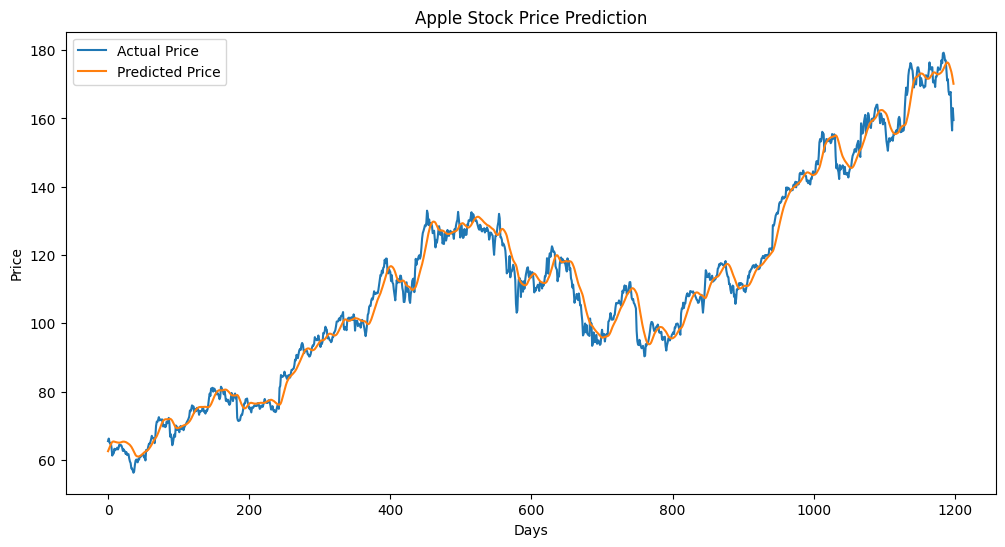

In [28]:
predicted = model.predict(x)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
!git config --global user.email "pearlyhannah108@gmail.com"
!git config --global user.name "pearly108"

In [33]:
!git clone


SyntaxError: invalid syntax (<ipython-input-33-c6e50fbff0f4>, line 2)